In [1]:
import Mapping_Functions as mf
import In_Situ_Functions as isf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pims_nd2 import ND2_Reader as nd2_opener
from os.path import join
from ipywidgets import interact
import sys

[5707 1457  169]


<IPython.core.display.Javascript object>


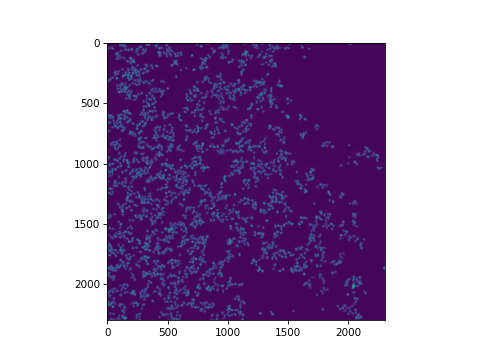

In [2]:
%matplotlib notebook

path_10X = 'genotyping/cycle_12'
path_40X = 'phenotyping'

M_10X = np.load('M_10X.npy')
M_40X = np.load('M_40X.npy')

Well = 2

p = 0

p_10X = np.array([[352, 1152, 1152]])

T_10X = p_10X[p, 0]; i_10X = p_10X[p, 1]; j_10X = p_10X[p, 2]

if Well == 2:    
    DOF = [1219.91419, -29.5278587, 0.00485282143, 3.95660683, 3.95711362]
    
P_10X = mf.Local_to_Global([[T_10X, i_10X, j_10X]], M_10X, [2304, 2304])
P_40X = mf.model_TRS(P_10X, DOF, angle='degree')
p_40X = mf.Global_to_Local(P_40X, M_40X, [2304, 2304])

p = 0
# p_40X = np.array([[2883, 1152, 1152]])

print(p_40X[p])

T_40X = p_40X[p, 0]
i_40X = p_40X[p, 1]
j_40X = p_40X[p, 2]

img_10X = isf.InSitu.Import_ND2_by_Tile_and_Well(T_10X, Well, path_10X)

# fig, ax1 = plt.subplots(1, 1)
# fig.set_size_inches(10, 10)
#Q = 50
# mf.Plot_Dots(img_10X[:, i_10X - Q : i_10X + Q, j_10X - Q : j_10X + Q])
# plt.scatter([Q], [Q], s=6, c='white')
plt.imshow(img_10X[-1])
plt.show()

In [6]:
# %matplotlib notebook

img_40X = isf.InSitu.Import_ND2_by_Tile_and_Well(T_40X, Well, path_40X)

# fig, ax1 = plt.subplots(1, 1)
# fig.set_size_inches(12, 12)
# fig.set_size_inches(16, 16)
# mf.Plot_Dots(img_40X)
# plt.scatter([j_40X], [i_40X], s=3, c='red')
# Q = 200
# mf.Plot_Dots(img_40X[:, i_40X - Q : i_40X + Q, j_40X - Q : j_40X + Q])
# plt.scatter([Q], [Q], s=6, c='white')

plt.imshow(img_40X[-1])
plt.show()